In [67]:
import pandas as pd
import plotly.express as px

import set_config

In [3]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))
print ("dir_race is %s" % (dir_race))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/
dir_race is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data


In [68]:
filename = 'oee_extracts_all_sites.xlsx'
path = os.path.join(dir_local, filename)
df = pd.read_excel(path, na_values=('-'))

In [69]:
df['WeekOfYear'] = pd.to_numeric(df['Week'].str[1:3])
df['Year'] = pd.to_numeric(df['Week'].str[4:])
dates = df.Year*100+df.WeekOfYear
df['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w', errors='coerce')
df.head()

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
0,NaN,NaN,0.363872,NaN,NaN,0.490873,0.748094,NaN,NaN,NaT
1,NaN,ANA - Pack 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,NaN,"FRA - Pharma, VL41",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,NaN,LTR - C3 Packaging Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,NaN,LTR - R1 Filling Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [70]:
df.dropna(subset=['WeekOfYear'], inplace=True)
df
# df

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,0.519638,0.069918,0.211838,0.711021,0.730834,1.0,2020.0,NaT
25,W01-2020,LSX - 1070-1 Packaging Line,0.359199,0.062479,0.470711,0.474172,0.762421,1.0,2020.0,NaT
26,W01-2020,LSX - 1070-2 Packaging Line,0.031299,0.000000,0.000000,1.000000,0.031299,1.0,2020.0,NaT
27,W01-2020,LSX - C65-1 Packaging Line,0.390467,0.139973,0.296680,0.601649,0.649678,1.0,2020.0,NaT
28,W01-2020,LSX - C65-2 Packaging Line,0.158301,0.089099,0.137793,0.706554,0.224047,1.0,2020.0,NaT
...,...,...,...,...,...,...,...,...,...,...
8935,W53-2020,TRS - L19 Packaging Line,NaN,NaN,NaN,NaN,NaN,53.0,2020.0,NaT
8936,W53-2020,TRS - L21 Packaging Line,NaN,NaN,NaN,NaN,NaN,53.0,2020.0,NaT
8937,W53-2020,TRS - L22 Packaging Line,NaN,NaN,NaN,NaN,NaN,53.0,2020.0,NaT
8938,W53-2020,TRS - L24 Packaging Line,NaN,NaN,NaN,NaN,NaN,53.0,2020.0,NaT


In [71]:
df.Line.unique()

array(['LSX - 1030 Packaging Line', 'LSX - 1070-1 Packaging Line',
       'LSX - 1070-2 Packaging Line', 'LSX - C65-1 Packaging Line',
       'LSX - C65-2 Packaging Line', 'LSX - IWK Packaging Line',
       'LSX - SIG1 Packaging Line', 'LSX - SIG2 Packaging Line',
       'LSX - SUPPO Packaging Line', 'LSX - TR135 Packaging Line',
       'LSX - TR200 Packaging Line', 'FRA - FF NLP, M18 Filling',
       'FRA - FF NLP, M18 Inspection', 'FRA - FF NLP, M21 Filling',
       'FRA - FF NLP, M21 Inspection', 'FRA - FF NLP, M22 Filling',
       'FRA - FF NLP, M22 Inspection', 'HZG - Blister packaging line 1',
       'HZG - Blister packaging line 2', 'HZG - Blister packaging line 3',
       'HZG - Blister packaging line 4', 'MAF - C2 Packaging Line',
       'MAF - C3 Packaging Line', 'MAF - C4 Packaging Line',
       'MAF - C5 Packaging Line', 'MAF - C6 Packaging Line',
       'MAF - C9 Packaging Line', 'MAF - I2 Inspection Line',
       'MAF - I4 Inspection Line', 'MAF - I5 Inspection Line',
   

<AxesSubplot:xlabel='Line,None'>

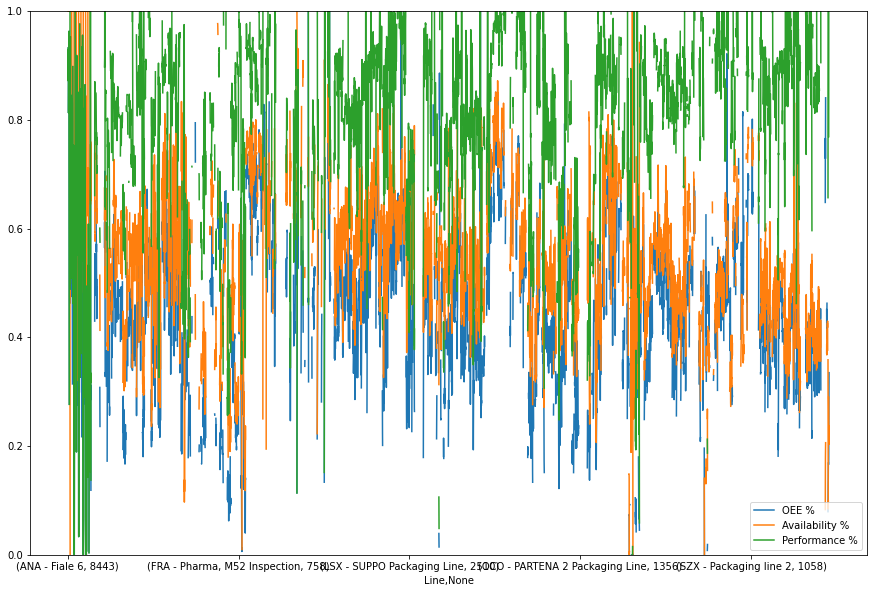

In [77]:
df.groupby('Line')[['OEE %','Availability %','Performance %']].rolling(window=4).mean().plot(figsize=(15,10), ylim=(0,1))

In [82]:
df.groupby('Line')[['OEE %','Availability %','Performance %']].agg(['count','mean'])

OEE %           Availability %            \
                               count      mean          count      mean   
Line                                                                      
ANA - Fiale 6                      1  0.018917              1  0.467283   
ELB - Extraction B12 1st cycle    27  0.733439             27  0.750083   
ELB - FERMENTATION E05            27  0.611262             27  0.909730   
ELB - FERMENTATION E06            27  0.451722             27  0.846434   
ELB - FERMENTATION E07            27  0.548899             27  0.865264   
...                              ...       ...            ...       ...   
WAT - AIL2 Packaging               8  0.456916              8  0.393191   
WAT - LYO INSPECTION               7  7.262697              7  0.401163   
WAT - LYO Packaging Line 3         8  0.124131              8  0.228860   
WAT - LYO Packaging Line 9         8  0.251019              8  0.263696   
WAT - PFS Filling Line             0       NaN              0       NaN   

                               Performance %             
                                       count       mean  
Line                                                     
ANA - Fiale 6                              1   0.041494  
ELB - Extraction B12 1st cycle            27   0.896803  
ELB - FERMENTATION E05                    27   0.665360  
ELB - FERMENTATION E06                    27   0.456475  
ELB - FERMENTATION E07                    26   0.611429  
...                                      ...        ...  
WAT - AIL2 Packaging                       8   1.157775  
WAT - LYO INSPECTION                       7  19.079511  
WAT - LYO Packaging Line 3                 8   1.253745  
WAT - LYO Packaging Line 9                 8   1.165633  
WAT - PFS Filling Line                     0        NaN  

[236 rows x 6 columns]

24      0.000000e+00
25     -2.319951e-03
26      0.000000e+00
27     -4.113434e-04
28      5.551115e-17
            ...     
8935             NaN
8936             NaN
8937             NaN
8938             NaN
8939             NaN
Length: 8916, dtype: float64

In [84]:
.6052979/.611262

0.9902429727350958